In [ ]:
import pandas as pd
from scipy import integrate
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,7)

# read the measurements file

In [167]:
def calc_AmpereSecFromDataFrame(df):
    return integrate.trapz(df.current_mA.div(1000), df.time_ms.div(1000))


def calc_load_coulomb_str(df):
    load = calc_AmpereSecFromDataFrame(df)
    return "Q = {:.4f} As".format(load)

# Deep sleep

In [225]:
df_deep_sleep = pd.read_csv("~/deep_sleep_15min.csv", sep=" ", names=["time_ms", "current_mA"])
df_deep_sleep = df_deep_sleep[df_deep_sleep.current_mA < 500]
df_deep_sleep = df_deep_sleep[df_deep_sleep.current_mA > 0]
df_deep_sleep = df_deep_sleep[df_deep_sleep.time_ms < 8787200]
df_deep_sleep.describe()

,time_ms,current_mA
count,3.937500e+06,3.937500e+06
mean,4.380048e+06,1.272215e-01
std,2.542643e+06,2.783496e+00
min,1.200000e+01,4.550000e-03
25%,2.174238e+06,2.273000e-02
50%,4.378065e+06,3.182000e-02
75%,6.582684e+06,4.091000e-02
max,8.787198e+06,1.454545e+02


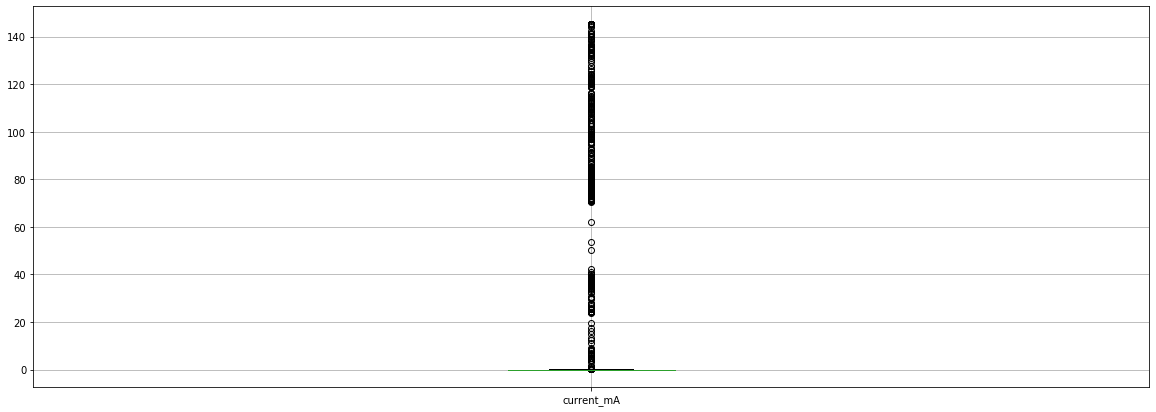

In [234]:
plt.boxplot(df_deep_sleep.current_mA, showfliers=False)

In [226]:
deep_sleep_load = calc_AmpereSecFromDataFrame(df_deep_sleep)
print("Deep sleep:", deep_sleep_load, "As")

Deep sleep: 1.119474068940207 As


In [ ]:
plt.title("(Deep sleep) " + calc_load_coulomb_str(deep_sleep_load))
plt.xlabel("t [min]")
plt.ylabel("Current [mA]")
plt.plot(deep_sleep_load.time_ms[:, None] / 60000, deep_sleep_load.current_mA[:, None], label="Current [mA]")
plt.legend()
plt.show()

# Light sleep

In [228]:
df_light_sleep = pd.read_csv("~/light_sleep_15min.csv", sep=" ", names=["time_ms", "current_mA"])
df_light_sleep = df_light_sleep[df_light_sleep.current_mA < 500]
df_light_sleep = df_light_sleep[df_light_sleep.current_mA > 0]
df_light_sleep = df_light_sleep[df_light_sleep.time_ms < 8787200]

modem_light_load = calc_AmpereSecFromDataFrame(df_light_sleep)
print("Light sleep:", modem_light_load, "As")
df_light_sleep.describe()

Light sleep: 182.30781510423694 As


,time_ms,current_mA
count,3.893654e+06,3.893654e+06
mean,4.378972e+06,2.046220e+01
std,2.543038e+06,3.101918e+01
min,1.200000e+01,6.590900e-01
25%,2.172502e+06,1.045450e+00
50%,4.376953e+06,1.386360e+00
75%,6.581894e+06,1.723636e+01
max,8.787198e+06,1.454545e+02


In [218]:
df_light_sleep.head(3)
df_light_sleep.tail(3)

,time_ms,current_mA
3893651,8787193,78.85000
3893652,8787195,78.70909
3893653,8787198,78.84546


/Users/DEV/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/Users/DEV/miniconda3/envs/ml/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


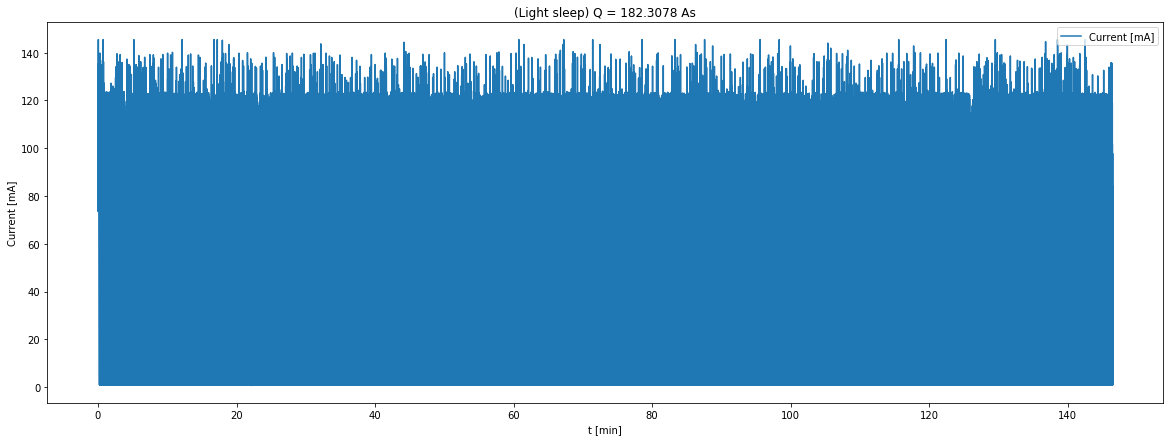

In [220]:
plt.title("(Light sleep) " + calc_load_coulomb_str(df_light_sleep))
plt.xlabel("t [min]")
plt.ylabel("Current [mA]")
plt.plot(df_light_sleep.time_ms[:, None] / 60000, df_light_sleep.current_mA[:, None], label="Current [mA]")
plt.legend()
plt.show()

# Modem sleep

In [229]:
df_modem_sleep = pd.read_csv("~/modem_sleep_15min.csv", sep=" ", names=["time_ms", "current_mA"])
#df_modem_sleep = df_modem_sleep[df_modem_sleep.time_ms < 8787200]
df_modem_sleep = df_modem_sleep[df_modem_sleep.current_mA < 500]
df_modem_sleep = df_modem_sleep[df_modem_sleep.current_mA > 0]
df_modem_sleep = df_modem_sleep[df_modem_sleep.time_ms < 8787200]

modem_sleep_load = calc_AmpereSecFromDataFrame(df_modem_sleep)
print("Modem sleep:", modem_sleep_load, "As")
df_modem_sleep.describe()

Modem sleep: 323.769500647573 As


,time_ms,current_mA
count,3.824359e+06,3.824359e+06
mean,4.373039e+06,3.690340e+01
std,2.541366e+06,2.807145e+01
min,1.200000e+01,4.550000e-03
25%,2.168580e+06,1.744091e+01
50%,4.369236e+06,1.747273e+01
75%,6.570794e+06,7.703182e+01
max,8.787198e+06,1.454545e+02


/Users/DEV/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/Users/DEV/miniconda3/envs/ml/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


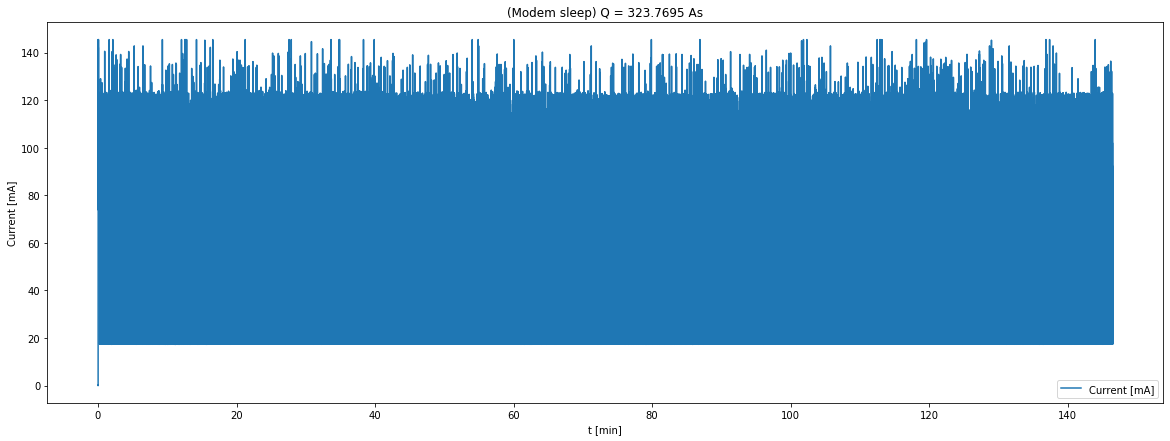

In [222]:
plt.title("(Modem sleep) " + calc_load_coulomb_str(df_modem_sleep))
plt.xlabel("t [min]")
plt.ylabel("Current [mA]")
plt.plot(df_modem_sleep.time_ms[:, None] / 60000, df_modem_sleep.current_mA[:, None], label="Current [mA]")
plt.legend()
plt.show()